In [16]:
import numpy as np
# import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
from numpy.random import seed
seed(1)

In [18]:
dataset=pd.read_csv("Data/testset.csv")
dataset

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.00,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.00,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.20,0.0,North,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99565,20161231-12:00,Partly Cloudy,15.0,0,0,NaN,77.0,NaN,1015.0,0,0,18.0,0,0,0.50,110.0,ESE,NaN,NaN,7.4
99566,20161231-13:00,Partly Cloudy,16.0,0,0,NaN,100.0,NaN,1014.0,0,0,16.0,0,0,0.80,90.0,East,NaN,NaN,3.7
99567,20161231-15:00,NaN,13.0,0,0,NaN,NaN,NaN,1016.0,0,0,NaN,0,0,0.05,10.0,North,NaN,NaN,59.3
99568,20161231-18:00,Patches of Fog,12.0,1,0,NaN,100.0,NaN,1016.0,0,0,12.0,0,0,0.50,NaN,NaN,NaN,NaN,0.0


In [19]:
dataset.columns=dataset.columns.str.replace("_","")
dataset.columns=dataset.columns.str.replace(" ","")
dataset.columns

Index(['datetimeutc', 'conds', 'dewptm', 'fog', 'hail', 'heatindexm', 'hum',
       'precipm', 'pressurem', 'rain', 'snow', 'tempm', 'thunder', 'tornado',
       'vism', 'wdird', 'wdire', 'wgustm', 'windchillm', 'wspdm'],
      dtype='object')

In [20]:
dataset.drop(columns=["conds","dewptm","fog","hail","heatindexm","precipm","rain","snow","thunder","tornado","vism","wdird","wdire","wgustm","windchillm"],inplace=True,axis=1)
dataset

,datetimeutc,hum,pressurem,tempm,wspdm
0,19961101-11:00,27.0,1010.0,30.0,7.4
1,19961101-12:00,32.0,-9999.0,28.0,NaN
2,19961101-13:00,44.0,-9999.0,24.0,NaN
3,19961101-14:00,41.0,1010.0,24.0,NaN
4,19961101-16:00,47.0,1011.0,23.0,0.0
...,...,...,...,...,...
99565,20161231-12:00,77.0,1015.0,18.0,7.4
99566,20161231-13:00,100.0,1014.0,16.0,3.7
99567,20161231-15:00,NaN,1016.0,NaN,59.3
99568,20161231-18:00,100.0,1016.0,12.0,0.0


In [21]:
dataset['pressurem'].replace('-9999.0',np.nan)
dataset.replace(0,np.nan)
dataset.isnull().sum()

datetimeutc       0
hum             756
pressurem       232
tempm           672
wspdm          2358
dtype: int64

In [22]:
dataset

,datetimeutc,hum,pressurem,tempm,wspdm
0,19961101-11:00,27.0,1010.0,30.0,7.4
1,19961101-12:00,32.0,-9999.0,28.0,NaN
2,19961101-13:00,44.0,-9999.0,24.0,NaN
3,19961101-14:00,41.0,1010.0,24.0,NaN
4,19961101-16:00,47.0,1011.0,23.0,0.0
...,...,...,...,...,...
99565,20161231-12:00,77.0,1015.0,18.0,7.4
99566,20161231-13:00,100.0,1014.0,16.0,3.7
99567,20161231-15:00,NaN,1016.0,NaN,59.3
99568,20161231-18:00,100.0,1016.0,12.0,0.0


In [23]:
hum_median=dataset["hum"].median()
dataset["hum"].fillna(hum_median,inplace=True)
pressurem_median=dataset["pressurem"].median()
dataset["pressurem"].fillna(pressurem_median,inplace=True)
wspdm_median=dataset["wspdm"].median()
dataset["wspdm"].fillna(wspdm_median,inplace=True)
tempm_median=dataset["tempm"].median()
dataset["tempm"].fillna(tempm_median,inplace=True)

In [24]:
dataset.isnull().sum()

datetimeutc    0
hum            0
pressurem      0
tempm          0
wspdm          0
dtype: int64

In [25]:
dataset

,datetimeutc,hum,pressurem,tempm,wspdm
0,19961101-11:00,27.0,1010.0,30.0,7.4
1,19961101-12:00,32.0,-9999.0,28.0,7.4
2,19961101-13:00,44.0,-9999.0,24.0,7.4
3,19961101-14:00,41.0,1010.0,24.0,7.4
4,19961101-16:00,47.0,1011.0,23.0,0.0
...,...,...,...,...,...
99565,20161231-12:00,77.0,1015.0,18.0,7.4
99566,20161231-13:00,100.0,1014.0,16.0,3.7
99567,20161231-15:00,58.0,1016.0,27.0,59.3
99568,20161231-18:00,100.0,1016.0,12.0,0.0


In [26]:
dataset["datetimeutc"]=pd.to_datetime(dataset["datetimeutc"])

In [27]:
dataset.set_index("datetimeutc",inplace=True)

In [28]:
dataset

,hum,pressurem,tempm,wspdm
datetimeutc,,,,
1996-11-01 11:00:00,27.0,1010.0,30.0,7.4
1996-11-01 12:00:00,32.0,-9999.0,28.0,7.4
1996-11-01 13:00:00,44.0,-9999.0,24.0,7.4
1996-11-01 14:00:00,41.0,1010.0,24.0,7.4
1996-11-01 16:00:00,47.0,1011.0,23.0,0.0
...,...,...,...,...
2016-12-31 12:00:00,77.0,1015.0,18.0,7.4
2016-12-31 13:00:00,100.0,1014.0,16.0,3.7
2016-12-31 15:00:00,58.0,1016.0,27.0,59.3


In [29]:
dataset=dataset.resample("D").mean()
dataset

,hum,pressurem,tempm,wspdm
datetimeutc,,,,
1996-11-01,52.916667,-2659.666667,22.333333,6.166667
1996-11-02,48.625000,1009.833333,22.916667,7.950000
1996-11-03,55.958333,1010.500000,21.791667,5.020833
1996-11-04,48.055556,1011.333333,22.722222,2.266667
1996-11-05,29.400000,1011.800000,27.800000,10.020000
...,...,...,...,...
2016-12-27,67.550000,1017.200000,16.850000,8.335000
2016-12-28,68.043478,1015.565217,17.217391,3.547826
2016-12-29,87.857143,1016.904762,15.238095,6.000000


In [30]:
def extract_year(value):
  value=value.strftime('%Y-%m-%d')
  return (value[0:4])


def extract_month(value):
    value=value.strftime('%Y-%m-%d')
    return (value[4:6])

def extract_date(value):
    value=value.strftime('%Y-%m-%d')
    return (value[6:8])

In [31]:
dataset.reset_index(inplace=True)
dataset


,datetimeutc,hum,pressurem,tempm,wspdm
0,1996-11-01,52.916667,-2659.666667,22.333333,6.166667
1,1996-11-02,48.625000,1009.833333,22.916667,7.950000
2,1996-11-03,55.958333,1010.500000,21.791667,5.020833
3,1996-11-04,48.055556,1011.333333,22.722222,2.266667
4,1996-11-05,29.400000,1011.800000,27.800000,10.020000
...,...,...,...,...,...
7361,2016-12-27,67.550000,1017.200000,16.850000,8.335000
7362,2016-12-28,68.043478,1015.565217,17.217391,3.547826
7363,2016-12-29,87.857143,1016.904762,15.238095,6.000000
7364,2016-12-30,89.666667,1017.904762,14.095238,6.266667


In [39]:
dataset.year.value_counts()

2000    366
2004    366
2008    366
2012    366
2016    366
2015    365
2009    365
1997    365
2001    365
2005    365
2013    365
2011    365
1998    365
2002    365
2006    365
2010    365
2014    365
1999    365
2003    365
2007    365
1996     61
Name: year, dtype: int64

In [40]:
dataset.groupby("year").tempm.mean()

year
1996    16.789936
1997    23.854387
1998    24.592939
1999    26.095426
2000    24.365561
2001    25.598511
2002    26.514802
2003    25.608446
2004    25.678487
2005    24.807183
2006    25.408800
2007    24.816346
2008    24.506554
2009    25.370685
2010    25.641194
2011    24.657133
2012    24.838056
2013    24.816530
2014    25.022268
2015    25.121832
2016    27.098860
Name: tempm, dtype: float64

In [34]:
dataset['day'] = dataset['datetimeutc'].dt.day
dataset['month'] = dataset['datetimeutc'].dt.month
dataset['year'] = dataset['datetimeutc'].dt.year

In [35]:
dataset.isnull().sum()

datetimeutc      0
hum            141
pressurem      141
tempm          141
wspdm          141
day              0
month            0
year             0
dtype: int64

In [36]:
dataset.fillna(dataset.mean(),inplace=True)

/home/shitiz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


In [37]:
dataset.isnull().sum()

datetimeutc    0
hum            0
pressurem      0
tempm          0
wspdm          0
day            0
month          0
year           0
dtype: int64

In [38]:
dataset_forest=dataset.drop(["datetimeutc"],axis=1)
dataset_forest

,hum,pressurem,tempm,wspdm,day,month,year
0,52.916667,-2659.666667,22.333333,6.166667,1,11,1996
1,48.625000,1009.833333,22.916667,7.950000,2,11,1996
2,55.958333,1010.500000,21.791667,5.020833,3,11,1996
3,48.055556,1011.333333,22.722222,2.266667,4,11,1996
4,29.400000,1011.800000,27.800000,10.020000,5,11,1996
...,...,...,...,...,...,...,...
7361,67.550000,1017.200000,16.850000,8.335000,27,12,2016
7362,68.043478,1015.565217,17.217391,3.547826,28,12,2016
7363,87.857143,1016.904762,15.238095,6.000000,29,12,2016
7364,89.666667,1017.904762,14.095238,6.266667,30,12,2016


In [41]:
y=dataset_forest["tempm"]
y

0       22.333333
1       22.916667
2       21.791667
3       22.722222
4       27.800000
          ...    
7361    16.850000
7362    17.217391
7363    15.238095
7364    14.095238
7365    15.650000
Name: tempm, Length: 7366, dtype: float64

In [42]:
dataset_forest.drop("tempm",inplace=True,axis=1)

In [43]:
X=dataset_forest.iloc[:,:].values

In [44]:
X.shape

(7366, 6)

In [45]:
y=y.values


In [46]:
y.shape

(7366,)

In [47]:
# Train and Test Part

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [50]:
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (4935, 6)
Shape of X_test (2431, 6)
Shape of y_train (4935,)
Shape of y_test (2431,)


In [51]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_Y=StandardScaler()
X_train=sc_X.fit_transform(X_train)
y_train=np.array(y_train).reshape(-1,1)
y_train=sc_Y.fit_transform(y_train)
# y_train=np.array(y_train).reshape(-1,1)

In [52]:
#Create Model
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(random_state=0)

In [53]:
model.fit(X_train,y_train.ravel())

DecisionTreeRegressor(random_state=0)

In [54]:
X_test=sc_X.fit_transform(X_test)

In [55]:
y_pred=model.predict(X_test)

In [56]:
y_pred=sc_Y.inverse_transform(y_pred)
y_pred

array([29.57142857, 31.75      , 25.18181818, ..., 16.66666667,
       33.125     , 18.        ])

In [57]:
y_test

array([28.875     , 32.5       , 24.75      , ..., 19.52173913,
       32.875     , 14.71428571])

In [58]:
# Accuracy
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'{mse} {mae} {r2}')

3.3668366860685643 2.4248063195710867 0.7884248235976702


In [59]:
y_pred.size

2431

In [61]:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
0,28.875000,29.571429
1,32.500000,31.750000
2,24.750000,25.181818
3,36.500000,36.250000
4,31.000000,29.500000
...,...,...
2426,35.000000,37.250000
2427,15.142857,25.181818
2428,19.521739,16.666667
2429,32.875000,33.125000


In [66]:
y_1=y_test[:70]
y_2=y_pred[:70]

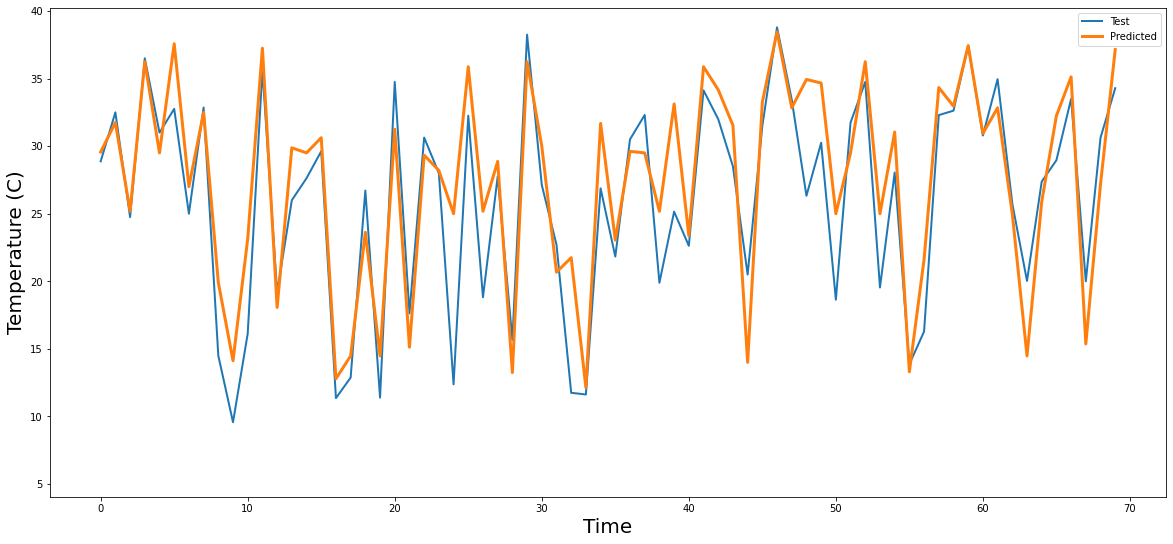

In [67]:
scale_factor=0.5
plt.figure(figsize=(20,9))
plt.plot(y_1,linewidth=2)
plt.plot(y_2,linewidth=3)
ymin,ymax=plt.ylim()
plt.ylim(ymin * scale_factor, ymax)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Temperature (C)", fontsize=20)
plt.legend(('Test','Predicted'))
plt.savefig('Plots/Decision_Tree.png')
plt.show()

In [68]:
test=pd.read_csv("archive/DailyDelhiClimateTest.csv")

In [69]:
test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [70]:
def extract_year(value):
    return (value[0:4])

In [71]:
def extract_month(value):
    return (value[5:7])

In [72]:
def extract_date(value):
    return (value[8:10])

In [73]:
test["year"]=test["date"].apply(lambda x : extract_year(x))

In [74]:
test["month"]=test["date"].apply(lambda x : extract_month(x))

In [75]:
test["dat"]=test["date"].apply(lambda x : extract_date(x))

In [76]:
test

,date,meantemp,humidity,wind_speed,meanpressure,year,month,dat
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,2017,01,01
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,2017,01,02
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,2017,01,03
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,2017,01,04
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,2017,01,05
...,...,...,...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000,2017,04,20
110,2017-04-21,34.250000,39.375000,6.962500,999.875000,2017,04,21
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000,2017,04,22
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000,2017,04,23


In [77]:
test.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
year             object
month            object
dat              object
dtype: object

In [78]:
pred=test['meantemp']
pred

0      15.913043
1      18.500000
2      17.111111
3      18.700000
4      18.388889
         ...    
109    34.500000
110    34.250000
111    32.900000
112    32.875000
113    32.000000
Name: meantemp, Length: 114, dtype: float64

In [79]:
test.drop('meantemp',inplace=True,axis=1)
test.drop('date',inplace=True,axis=1)
# test.drop('meanpressure',inplace=True,axis=1)
test

,humidity,wind_speed,meanpressure,year,month,dat
0,85.869565,2.743478,59.000000,2017,01,01
1,77.222222,2.894444,1018.277778,2017,01,02
2,81.888889,4.016667,1018.333333,2017,01,03
3,70.050000,4.545000,1015.700000,2017,01,04
4,74.944444,3.300000,1014.333333,2017,01,05
...,...,...,...,...,...,...
109,27.500000,5.562500,998.625000,2017,04,20
110,39.375000,6.962500,999.875000,2017,04,21
111,40.900000,8.890000,1001.600000,2017,04,22
112,27.500000,9.962500,1002.125000,2017,04,23


In [80]:
X=test.iloc[:,:].values
X.shape

(114, 6)

In [81]:
X=sc_X.fit_transform(X)

In [82]:
pred=pred.values
pred.shape

(114,)

In [83]:
y_pred=model.predict(X)

In [84]:
y_pred=sc_Y.inverse_transform(y_pred)
y_pred

array([16.92307692, 16.11111111, 16.11111111, 16.11111111, 16.11111111,
       14.75      , 13.8       , 18.16666667, 18.16666667, 18.5       ,
       18.5       , 18.125     , 18.125     , 18.125     , 18.125     ,
       18.5       , 18.16666667, 18.16666667, 14.875     , 14.875     ,
       14.625     , 18.125     , 18.125     , 18.125     , 16.28571429,
       11.08333333, 13.5       , 10.1       , 13.5       , 18.16666667,
       18.125     , 25.        , 26.43478261, 25.        , 26.22222222,
       25.        , 26.22222222, 26.125     , 26.125     , 26.125     ,
       26.54166667, 26.125     , 24.75      , 26.43478261, 26.43478261,
       26.43478261, 26.54166667, 26.54166667, 24.75      , 26.125     ,
       26.125     , 26.54166667, 33.125     , 26.54166667, 26.54166667,
       26.54166667, 26.54166667, 31.52631579, 31.52631579, 31.73913043,
       31.66666667, 31.5       , 30.5625    , 27.13043478, 27.13043478,
       33.        , 27.13043478, 31.68181818, 26.54166667, 31.75

In [85]:
pred

array([15.91304348, 18.5       , 17.11111111, 18.7       , 18.38888889,
       19.31818182, 14.70833333, 15.68421053, 14.57142857, 12.11111111,
       11.        , 11.78947368, 13.23529412, 13.2       , 16.43478261,
       14.65      , 11.72222222, 13.04166667, 14.61904762, 15.26315789,
       15.39130435, 18.44      , 18.11764706, 18.34782609, 21.        ,
       16.17857143, 16.5       , 14.86363636, 15.66666667, 16.44444444,
       16.125     , 15.25      , 17.09090909, 15.63636364, 18.7       ,
       18.63157895, 16.88888889, 15.125     , 15.7       , 15.375     ,
       14.66666667, 15.625     , 16.25      , 16.33333333, 16.875     ,
       17.57142857, 20.25      , 21.3       , 21.125     , 22.36363636,
       23.375     , 21.83333333, 19.125     , 18.625     , 19.125     ,
       19.        , 18.75      , 19.875     , 23.33333333, 24.46153846,
       23.75      , 20.5       , 19.125     , 19.75      , 20.        ,
       22.625     , 21.54545455, 20.78571429, 19.9375    , 18.53

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [87]:
mean_absolute_error(y_pred,pred)

7.810710920106373

In [88]:
mean_squared_error(y_pred,pred,squared=False)

9.454551635614115

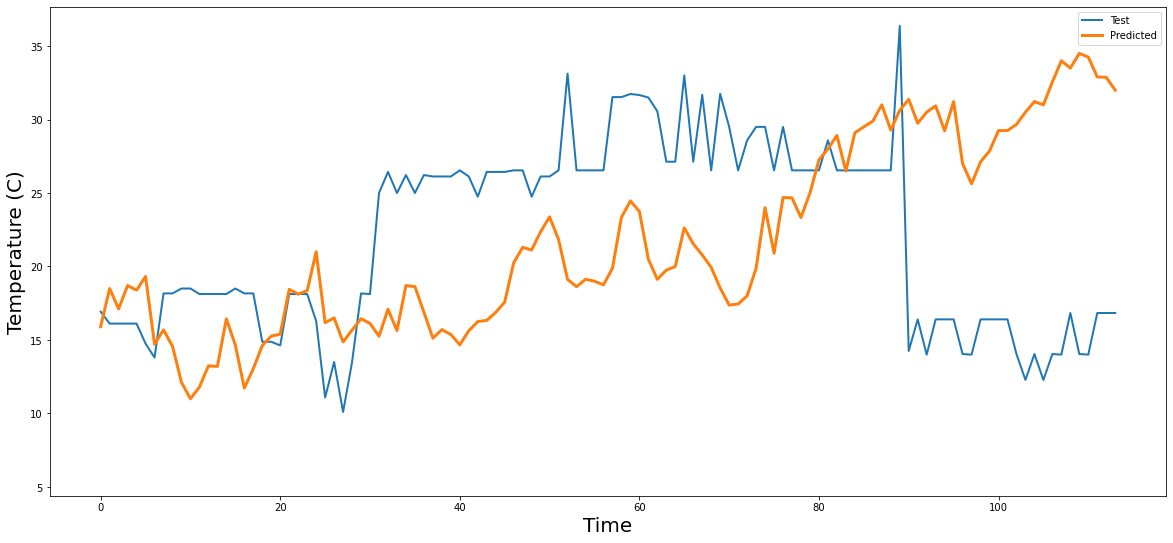

In [89]:
scale_factor=0.5
plt.figure(figsize=(20,9))
plt.plot(y_pred,linewidth=2)
plt.plot(pred,linewidth=3)
ymin,ymax=plt.ylim()
plt.ylim(ymin * scale_factor, ymax)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Temperature (C)", fontsize=20)
plt.legend(('Test','Predicted'))
plt.savefig('Plots/Decision_Tree.png')
plt.show()